# Exploratory Analysis on the Anciect Indic Text Rigved

### Importing required libraries

In [ ]:
!pip install chars2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 57.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chars2vec: filename=chars2vec-0.1.7-py3-none-any.whl size=8111078 sha256=bd1676f934bec9be75214224e667c6608cb4c32981fdfd3db0902f759a751a7a
  Stored in directory: /root/.cache/pip/wheels/27/70/1e/517d2c39ea1d2f3f219185aca14c0e74d1a746f54ace702a16
Successfully built chars2vec


In [ ]:
import bs4 as bs
import urllib.request
import re
import nltk
import chars2vec

import requests
from bs4 import BeautifulSoup

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import re

### Defining Functions

In [ ]:
def get_links(base_url,start_index,end_index):
    """Getting links for url via index value"""
    urls=[]
    for i in range(start_index,end_index+1):
        temp=base_url+str(i)+".htm"
        urls.append(temp)
    return urls

In [ ]:
'''
def scrape_p_1(url):
    """Function to scrape data from HTTP url"""
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    text = soup.find_all('p')[1].prettify()
    my_list = [i.replace('<br>', '').replace('<br/>', '').replace('<p>', '').replace('</p>', '') for i in text.split()]
    return ' '.join(my_list)


In [ ]:
def scrape_p_1_v1(url):
    """Function to scrape data from FTP url"""
    requests_session = requests.session()
    requests_session.mount('file://', LocalFileAdapter())
    page = requests_session.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    text = soup.find_all('p')[1].prettify()
    my_list = [i.replace('<br>', '').replace('<br/>', '').replace('<p>', '').replace('</p>', '') for i in text.split()]
    return ' '.join(my_list)


In [ ]:
def get_text_in_list_format(urls):
    """Function to append the scrapped raw text in a list"""
    all_text=[]
    for url in urls:
        all_text.append(scrape_p_1_v1(url))
    return all_text

In [ ]:
def get_text_in_string_format(urls):
    """Function to append the scrapped raw text in a string"""
    all_text=''
    for url in urls:
        all_text = all_text + scrape_p_1_v1(url)+"\n"
    return all_text

In [ ]:
# textfile = open("rigved_full_eng.txt", "w")
# for element in b:
#     textfile.write(element)
# textfile.close()

### Scrapping data from Public HTML folder using FTP to get the text

In [ ]:
full_book=[]

In [ ]:
links_for_book1 = get_links('file://C:/Users/madpa/Indo-European-language-family-analysis-using-NLP-techniques/dataset/public_html/hin/rigveda/rv0',1001,1191)

In [ ]:
links_for_book1

['file://C:/Users/madpa/Indo-European-language-family-analysis-using-NLP-techniques/dataset/public_html/hin/rigveda/rv01001.htm',
 'file://C:/Users/madpa/Indo-European-language-family-analysis-using-NLP-techniques/dataset/public_html/hin/rigveda/rv01002.htm',
 'file://C:/Users/madpa/Indo-European-language-family-analysis-using-NLP-techniques/dataset/public_html/hin/rigveda/rv01003.htm',
 'file://C:/Users/madpa/Indo-European-language-family-analysis-using-NLP-techniques/dataset/public_html/hin/rigveda/rv01004.htm',
 'file://C:/Users/madpa/Indo-European-language-family-analysis-using-NLP-techniques/dataset/public_html/hin/rigveda/rv01005.htm',
 'file://C:/Users/madpa/Indo-European-language-family-analysis-using-NLP-techniques/dataset/public_html/hin/rigveda/rv01006.htm',
 'file://C:/Users/madpa/Indo-European-language-family-analysis-using-NLP-techniques/dataset/public_html/hin/rigveda/rv01007.htm',
 'file://C:/Users/madpa/Indo-European-language-family-analysis-using-NLP-techniques/datase

#### the length checkouts with the total number of hyms in the first Mandala of the Rigved which is 191

In [ ]:
len(links_for_book1)

191

#### Connecting to FTP using Python's requests library

In [ ]:
from requests_testadapter import Resp

In [ ]:
import os

In [ ]:
class LocalFileAdapter(requests.adapters.HTTPAdapter):
    def build_response_from_file(self, request):
        file_path = request.url[7:]
        with open(file_path, 'rb') as file:
            buff = bytearray(os.path.getsize(file_path))
            file.readinto(buff)
            resp = Resp(buff)
            r = self.build_response(request, resp)

            return r

    def send(self, request, stream=False, timeout=None,
             verify=True, cert=None, proxies=None):

        return self.build_response_from_file(request)

#### Example for POC

In [ ]:
requests_session = requests.session()
requests_session.mount('file://', LocalFileAdapter())

In [ ]:
requests_session.get('file://C:/Users/madpa/Indo-European-language-family-analysis-using-NLP-techniques/public_html/public_html/hin/rigveda/rv01001.htm')

<Response [200]>

## Getting the acient Indic books

In [ ]:
book1_str = get_text_in_string_format(links_for_book1)

In [ ]:
book1_str

' 1 I Laud Agni, the chosen Priest, God, minister of sacrifice,  The hotar, lavishest of wealth.  2 Worthy is Agni to be praised by living as by ancient seers.  He shall bring hitherward the Gods.  3 Through Agni man obtaineth wealth, yea, plenty waxing day by day,  Most rich in heroes, glorious.  4 Agni, the perfect sacrifice which thou encompassest about  Verily goeth to the Gods.  5 May Agni, sapient-minded Priest, truthful, most gloriously great,  The God, come hither with the Gods.  6 Whatever blessing, Agni, thou wilt grant unto thy worshipper,  That, Aṅgiras, is indeed thy truth.  7 To thee, dispeller of the night, O Agni, day by day with prayer  Bringing thee reverence, we come  8 Ruler of sacrifices, guard of Law eternal, radiant One,  Increasing in thine own abode.  9 Be to us easy of approach, even as a father to his son:  Agni, be with us for our weal. \n 1 BEAUTIFUL Vāyu, come, for thee these Soma drops have been prepared:  Drink of them, hearken to our call.  2 Knowing th

In [ ]:
book1_list = get_text_in_list_format(links_for_book1)

In [ ]:
book1_list

[' 1 I Laud Agni, the chosen Priest, God, minister of sacrifice,  The hotar, lavishest of wealth.  2 Worthy is Agni to be praised by living as by ancient seers.  He shall bring hitherward the Gods.  3 Through Agni man obtaineth wealth, yea, plenty waxing day by day,  Most rich in heroes, glorious.  4 Agni, the perfect sacrifice which thou encompassest about  Verily goeth to the Gods.  5 May Agni, sapient-minded Priest, truthful, most gloriously great,  The God, come hither with the Gods.  6 Whatever blessing, Agni, thou wilt grant unto thy worshipper,  That, Aṅgiras, is indeed thy truth.  7 To thee, dispeller of the night, O Agni, day by day with prayer  Bringing thee reverence, we come  8 Ruler of sacrifices, guard of Law eternal, radiant One,  Increasing in thine own abode.  9 Be to us easy of approach, even as a father to his son:  Agni, be with us for our weal. ',
 ' 1 BEAUTIFUL Vāyu, come, for thee these Soma drops have been prepared:  Drink of them, hearken to our call.  2 Knowin

In [ ]:
len(book1_list)

191

In [ ]:
book1_list[0]

' 1 I Laud Agni, the chosen Priest, God, minister of sacrifice,  The hotar, lavishest of wealth.  2 Worthy is Agni to be praised by living as by ancient seers.  He shall bring hitherward the Gods.  3 Through Agni man obtaineth wealth, yea, plenty waxing day by day,  Most rich in heroes, glorious.  4 Agni, the perfect sacrifice which thou encompassest about  Verily goeth to the Gods.  5 May Agni, sapient-minded Priest, truthful, most gloriously great,  The God, come hither with the Gods.  6 Whatever blessing, Agni, thou wilt grant unto thy worshipper,  That, Aṅgiras, is indeed thy truth.  7 To thee, dispeller of the night, O Agni, day by day with prayer  Bringing thee reverence, we come  8 Ruler of sacrifices, guard of Law eternal, radiant One,  Increasing in thine own abode.  9 Be to us easy of approach, even as a father to his son:  Agni, be with us for our weal. '

# **Placing bookmark to Continue from here**

### EDA for entire Rigved

In [ ]:
# Download NLTK data files (only run once)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load the text corpus
with open('/content/rigved_full_book.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [ ]:

# Preprocessing
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [ ]:
tokens = preprocess_text(text)

In [ ]:
# Word Frequency Analysis
freq_dist = FreqDist(tokens)
print(freq_dist.most_common(20))


[('us', 3161), ('thou', 3062), ('indra', 2350), ('thee', 2034), ('may', 1956), ('thy', 1843), ('ye', 1808), ('agni', 1632), ('gods', 1502), ('like', 1396), ('hath', 1301), ('soma', 1189), ('come', 1106), ('1', 1052), ('heaven', 1050), ('2', 1027), ('3', 1026), ('4', 988), ('men', 969), ('5', 945)]


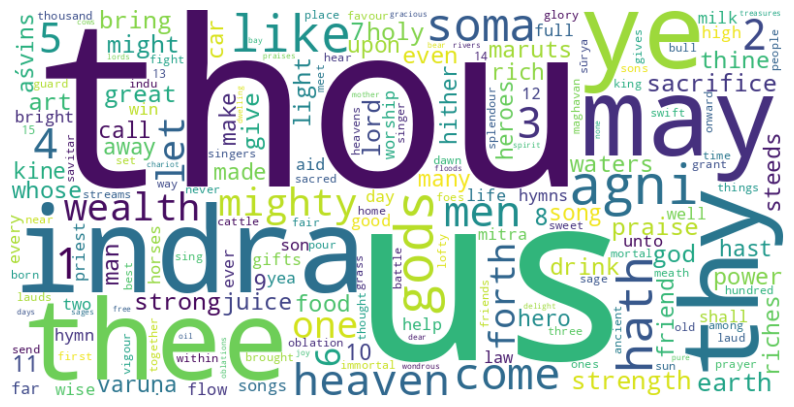

In [ ]:
# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# N-grams Analysis (bigrams)
bigrams = ngrams(tokens, 2)
bigram_freq = FreqDist(bigrams)
print(bigram_freq.most_common(20))

[(('thou', 'art'), 336), (('give', 'us'), 224), (('earth', 'heaven'), 219), (('soma', 'juice'), 208), (('heaven', 'earth'), 199), (('thou', 'hast'), 181), (('let', 'us'), 148), (('ye', 'gods'), 135), (('art', 'thou'), 132), (('varuṇa', 'mitra'), 126), (('drink', 'soma'), 123), (('far', 'away'), 121), (('bring', 'us'), 115), (('preserve', 'us'), 113), (('come', 'us'), 112), (('come', 'hither'), 97), (('bay', 'steeds'), 97), (('sacred', 'grass'), 93), (('us', 'wealth'), 89), (('indra', 'thou'), 89)]


In [ ]:
# N-grams Analysis (trigrams)
trigrams = ngrams(tokens, 3)
trigram_freq = FreqDist(trigrams)
print(trigram_freq.most_common(20))

[(('preserve', 'us', 'evermore'), 77), (('us', 'evermore', 'ye'), 60), (('drink', 'soma', 'juice'), 59), (('evermore', 'ye', 'gods'), 59), (('ye', 'gods', 'blessings'), 59), (('gods', 'blessings', '1'), 58), (('hither', 'unto', 'us'), 30), (('varuṇa', 'mitra', 'aryaman'), 26), (('thou', 'art', 'waxing'), 23), (('sing', 'thy', 'praise'), 22), (('unto', 'us', 'aśvins'), 22), (('us', 'aśvins', 'aids'), 22), (('art', 'waxing', 'great'), 22), (('give', 'us', 'wealth'), 21), (('indra', 'give', 'us'), 21), (('earth', 'heaven', '1'), 21), (('may', 'find', 'strengthening'), 21), (('find', 'strengthening', 'food'), 21), (('strengthening', 'food', 'full'), 21), (('food', 'full', 'abundance'), 21)]


Counter({'NOUN': 71043, 'VERB': 36107, 'ADJ': 22200, 'PROPN': 21987, 'NUM': 12938, 'ADV': 6251, 'PRON': 5195, 'AUX': 3331, 'ADP': 3270, 'DET': 860, 'SCONJ': 838, 'X': 213, 'INTJ': 127, 'CCONJ': 57, 'PART': 30, 'PUNCT': 5})


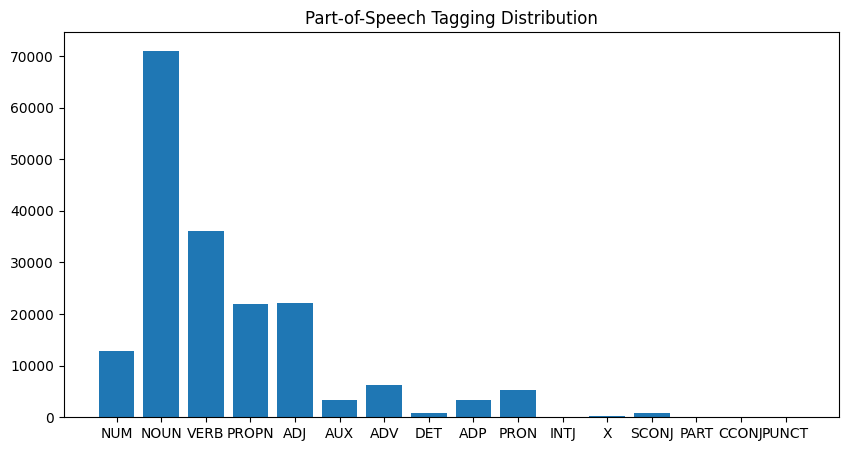

In [ ]:
# POS Tagging using spaCy
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 2000000
doc = nlp(' '.join(tokens))
pos_counts = Counter([token.pos_ for token in doc])
print(pos_counts)

# Bar chart for POS distribution
plt.figure(figsize=(10, 5))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title('Part-of-Speech Tagging Distribution')
plt.show()

In [ ]:
# Advanced NLP - Topic Modeling using LDA
# Creating a dictionary and corpus for LDA
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow([token]) for token in tokens]

# Training the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.083*"thou" + 0.053*"thy" + 0.053*"thee" + 0.028*"let" + 0.024*"come"')
(1, '0.040*"hath" + 0.038*"like" + 0.033*"ye" + 0.024*"one" + 0.022*"earth"')
(2, '0.072*"us" + 0.057*"may" + 0.038*"3" + 0.038*"2" + 0.036*"agni"')
(3, '0.054*"indra" + 0.047*"gods" + 0.031*"soma" + 0.022*"forth" + 0.022*"mighty"')
(4, '0.039*"1" + 0.028*"4" + 0.025*"5" + 0.015*"man" + 0.015*"strength"')


In [ ]:
# Visualize topics (Optional: Install pyLDAvis to visualize)
try:
    import pyLDAvis.gensim_models as gensimvis
    import pyLDAvis
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.display(vis)
except ImportError:
    print("pyLDAvis not installed. Install it using 'pip install pyldavis' to visualize topics.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Applying Advance NLP Techniques on entire Rigved Text Corpus

In [ ]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=ad036fc114f1e6253d666716c6bd431fda9acb5b59fd18e58880b378c06a6927
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.2 MB/s eta 0:00:00


In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
import nltk
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec, FastText
from gensim.models import Phrases
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tqdm import tqdm
import spacy
import torch
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer, util
import umap.umap_ as umap
import hdbscan
from bertopic import BERTopic
import plotly.express as px

In [ ]:
def preprocess_text(text):
    # Sentence Tokenization
    sentences = sent_tokenize(text)

    # Cleaning sentences
    cleaned_sentences = []
    for sent in sentences:
        # Remove unwanted characters and lowercase
        sent_clean = re.sub(r'[^A-Za-z\s]', '', sent).lower()
        # Remove extra spaces
        sent_clean = re.sub(r'\s+', ' ', sent_clean).strip()
        cleaned_sentences.append(sent_clean)

    return cleaned_sentences


In [ ]:
cleaned_sentences = preprocess_text(text)
print(f"Total Sentences: {len(cleaned_sentences)}")

Total Sentences: 184426


In [ ]:
stop_words = set(stopwords.words('english'))

def tokenize_sentences(sentences):
    tokenized_sentences = []
    for sent in sentences:
        tokens = word_tokenize(sent)
        tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
        tokenized_sentences.append(tokens)
    return tokenized_sentences


In [ ]:
tokenized_sentences = tokenize_sentences(cleaned_sentences)
print(f"Sample Tokenized Sentence: {tokenized_sentences[0]}")

Sample Tokenized Sentence: []


In [ ]:
# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=2, workers=4)

# Vocabulary Size
print(f"Word2Vec Vocabulary Size: {len(w2v_model.wv.index_to_key)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Word2Vec Vocabulary Size: 6604


In [ ]:
word = 'agni'  # Example word
if word in w2v_model.wv.key_to_index:
    similar_words = w2v_model.wv.most_similar(word, topn=10)
    print(f"Words similar to '{word}':")
    for sim_word, score in similar_words:
        print(f"{sim_word}: {score:.4f}")
else:
    print(f"'{word}' not in vocabulary.")

Words similar to 'agni':
god: 0.9954
worship: 0.9926
guard: 0.9924
savitar: 0.9906
jtavedas: 0.9895
hear: 0.9895
favour: 0.9894
prayer: 0.9894
sacrifice: 0.9893
sapient: 0.9889


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
word = 'indra'  # Example word
if word in w2v_model.wv.key_to_index:
    similar_words = w2v_model.wv.most_similar(word, topn=10)
    print(f"Words similar to '{word}':")
    for sim_word, score in similar_words:
        print(f"{sim_word}: {score:.4f}")
else:
    print(f"'{word}' not in vocabulary.")

Words similar to 'indra':
drankest: 0.9840
gladdening: 0.9805
savoury: 0.9791
pressed: 0.9774
shed: 0.9766
draught: 0.9766
thee: 0.9765
expressed: 0.9759
juices: 0.9739
flowing: 0.9726


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
word = 'soma'  # Example word
if word in w2v_model.wv.key_to_index:
    similar_words = w2v_model.wv.most_similar(word, topn=10)
    print(f"Words similar to '{word}':")
    for sim_word, score in similar_words:
        print(f"{sim_word}: {score:.4f}")
else:
    print(f"'{word}' not in vocabulary.")

Words similar to 'soma':
juice: 0.9925
drink: 0.9888
pressed: 0.9859
outpoured: 0.9720
savoury: 0.9514
indra: 0.9442
gladdening: 0.9389
shed: 0.9332
wellpressed: 0.9327
draught: 0.9266


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


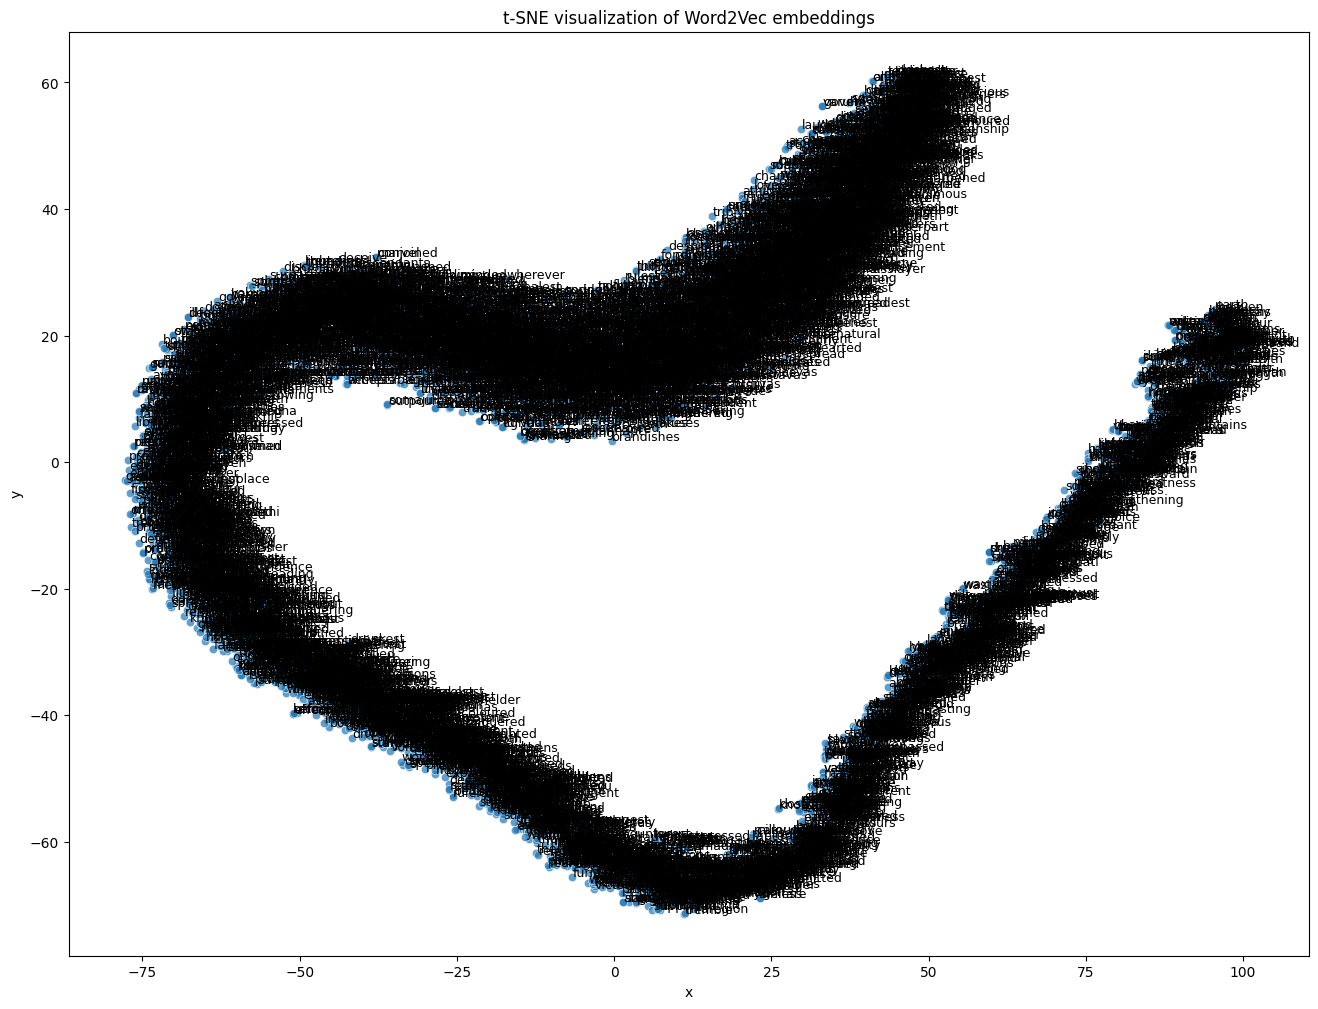

In [ ]:
# Get word vectors
word_vectors = w2v_model.wv[w2v_model.wv.key_to_index]

# Reduce dimensions with PCA before t-SNE for efficiency
# pca = PCA(n_components=50)
# word_vectors_pca = pca.fit_transform(word_vectors)

# Apply t-SNE
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3000, random_state=42)
tsne_result = tsne_model.fit_transform(word_vectors)

# Create DataFrame
words = w2v_model.wv.index_to_key
df_tsne = pd.DataFrame(tsne_result, columns=['x', 'y'])
df_tsne['word'] = words

# Plotting
plt.figure(figsize=(16, 12))
sns.scatterplot(x='x', y='y', data=df_tsne, legend=False, alpha=0.7)
for i in range(len(df_tsne)):
    plt.text(df_tsne['x'][i]+0.1, df_tsne['y'][i]+0.1, df_tsne['word'][i], fontsize=9)
plt.title('t-SNE visualization of Word2Vec embeddings')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


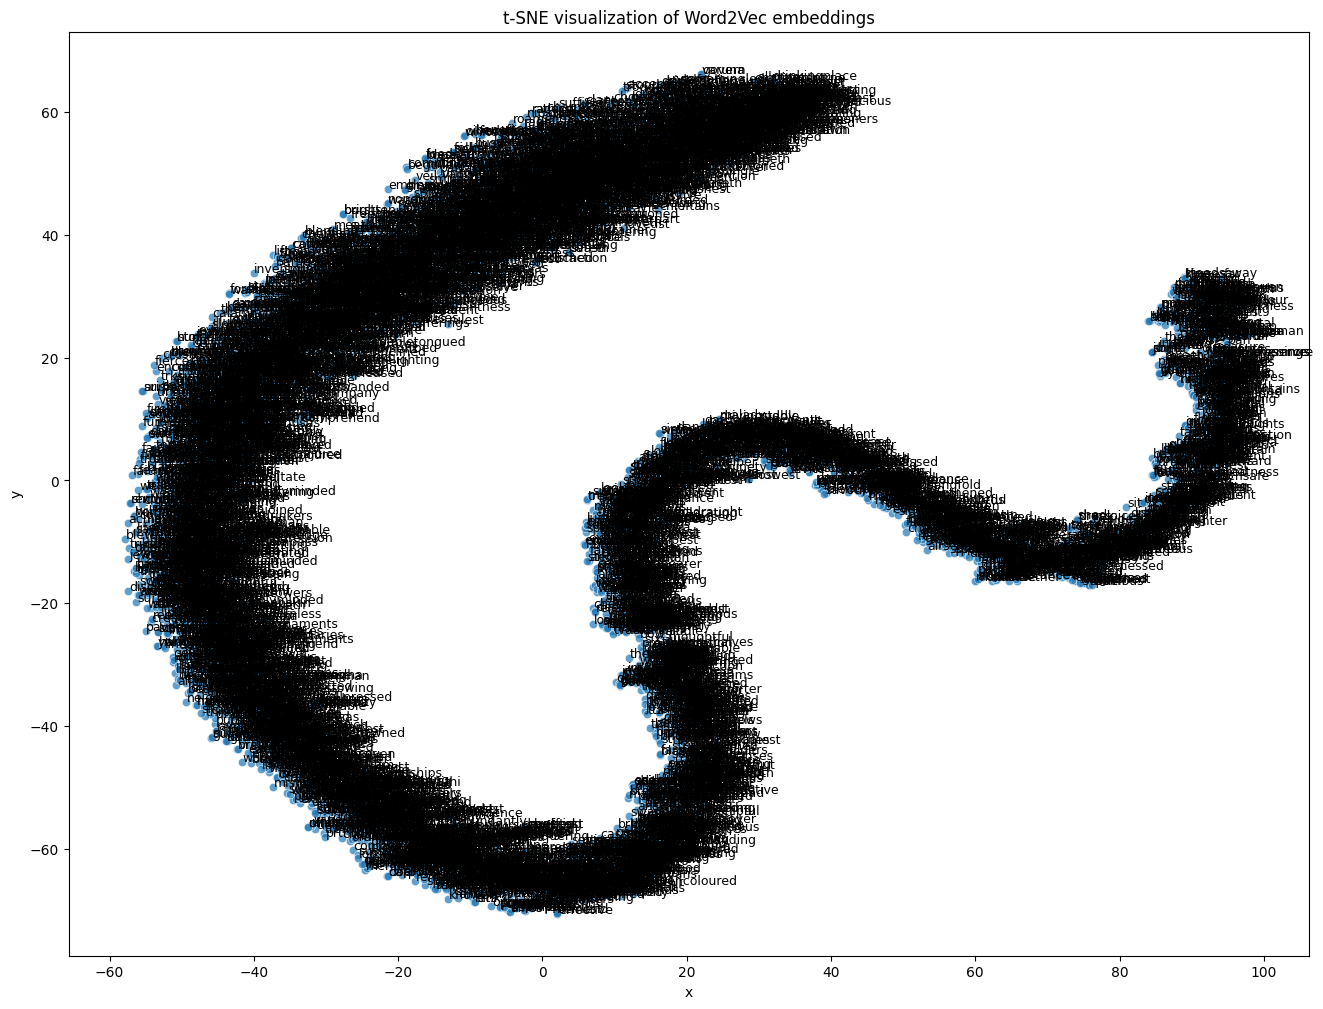

In [ ]:
# Get word vectors
word_vectors = w2v_model.wv[w2v_model.wv.key_to_index]

# Reduce dimensions with PCA before t-SNE for efficiency
pca = PCA(n_components=50)
word_vectors_pca = pca.fit_transform(word_vectors)

# Apply t-SNE
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3000, random_state=42)
tsne_result = tsne_model.fit_transform(word_vectors_pca)

# Create DataFrame
words = w2v_model.wv.index_to_key
df_tsne = pd.DataFrame(tsne_result, columns=['x', 'y'])
df_tsne['word'] = words


In [ ]:

# Plotting
plt.figure(figsize=(16, 12))
sns.scatterplot(x='x', y='y', data=df_tsne, legend=False, alpha=0.7)
for i in range(len(df_tsne)):
    plt.text(df_tsne['x'][i]+0.1, df_tsne['y'][i]+0.1, df_tsne['word'][i], fontsize=9)
plt.title('t-SNE visualization of Word2Vec embeddings')
plt.show()

In [ ]:
# Load Sentence-BERT model
sbert_model = SentenceTransformer('all-mpnet-base-v2')  # You can choose other models as well


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:

# Generate embeddings
sentence_embeddings = sbert_model.encode(cleaned_sentences, show_progress_bar=True)

print(f"Embedding shape: {sentence_embeddings.shape}")

In [ ]:
## Save the embeddings
#np.save('/content/sentence_embeddings.npy', sentence_embeddings)

## Load the embeddings
sentence_embeddings = np.load('/content/rigved_sentence_embeddings.npy')

In [ ]:
# Choose a query sentence
query_sentence = "Agni is the messenger of the Gods."

# Preprocess and encode
query_embedding = sbert_model.encode(query_sentence)

# Compute cosine similarities
similarities = util.cos_sim(query_embedding, sentence_embeddings)[0]
top_k = 5  # Number of similar sentences to retrieve
top_results = torch.topk(similarities, k=top_k)

print(f"Query Sentence: {query_sentence}\n")
print("Top similar sentences:")
for score, idx in zip(top_results[0], top_results[1]):
    print(f"Score: {score:.4f} - Sentence: {cleaned_sentences[idx]}")

Query Sentence: Agni is the messenger of the Gods.

Top similar sentences:
Score: 0.8407 - Sentence: may
Score: 0.8219 - Sentence: within
Score: 0.7916 - Sentence: barley
Score: 0.7911 - Sentence: thou
Score: 0.7909 - Sentence: us


In [ ]:
# Dimensionality Reduction with UMAP
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(sentence_embeddings)

# Clustering with HDBSCAN
cluster = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom').fit(umap_embeddings)

# Preparing DataFrame
clustered_df = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
clustered_df['cluster'] = cluster.labels_
clustered_df['sentence'] = cleaned_sentences

# Interactive Plot with Plotly
fig = px.scatter(clustered_df, x='x', y='y', color='cluster', hover_data=['sentence'])
fig.update_layout(title='Sentence Embedding Clusters', width=800, height=600)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
# Initialize BERTopic
bertopic_model = BERTopic(verbose=True)

# Fit the model
topics, probabilities = bertopic_model.fit_transform(cleaned_sentences)

# View topics
bertopic_model.get_topic_info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

2024-09-02 23:01:19,152 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/564 [00:00<?, ?it/s]

2024-09-02 23:05:24,162 - BERTopic - Embedding - Completed ✓
2024-09-02 23:05:24,164 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-09-02 23:05:50,348 - BERTopic - Dimensionality - Completed ✓
2024-09-02 23:05:50,351 - BERTopic - Cluster - Start clustering the reduced embeddings
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

2024-09-02 23:05:54,919 - BERTopic - Cluster - Completed ✓
2024-09-02 23:05:54,933 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-09-02 23:05:55,509 - BERTopic - Representation - Completed ✓


Topic  Count                                     Name  \
0       -1   7699                         -1_the_he_and_of   
1        0   1288               0_soma_drink_juice_pressed   
2        1    969                     1_ho_looser_aha_alas   
3        2    438               2_hymns_songs_hymn_singers   
4        3    425             3_agni_priest_sacrifice_gods   
..     ...    ...                                      ...   
159    158     10                158_milk_youth_heeds_adds   
160    159     10  159_gandharva_rowed_waterssuch_pointing   
161    160     10               160_mighty_allgod_gonse_do   
162    161     10     161_food_distribution_death_offering   
163    162     10             162_mitra_song_varua_noblest   

                                        Representation  \
0     [the, he, and, of, thou, to, in, who, with, his]   
1    [soma, drink, juice, pressed, indra, juices, p...   
2    [ho, looser, aha, alas, dent, sides, excellent...   
3    [hymns, songs, hymn, singers, praise, song, si...   
4    [agni, priest, sacrifice, gods, is, lord, mort...   
..                                                 ...   
159  [milk, youth, heeds, adds, whomsoever, damsel,...   
160  [gandharva, rowed, waterssuch, pointing, laid,...   
161  [mighty, allgod, gonse, do, foeslaying, most, ...   
162  [food, distribution, death, offering, furthers...   
163  [mitra, song, varua, noblest, foemanslaying, p...   

                                   Representative_Docs  
0    [thou agni most victorious with thy conquering...  
1    [for thee this soma is effused o indra drink o...  
2                       [excellent, is this, ho there]  
3    [send down of your free will prosper our holy ...  
4    [agni is sovran lord of wealth agni of great p...  
..                                                 ...  
159  [now like a swan he maketh all the company sin...  
160  [his bridle the gandharva grasped, waters from...  
161  [and now sent forth it hath attained to mighty...  
162  [thee we invoke the guest of men by whose mout...  
163  [varua and mitra and all the maruts sang a son...  

[164 rows x 5 columns]

In [ ]:
# Initialize BERTopic
bertopic_model = BERTopic(verbose=True)

# Fit the model
topics, probabilities = bertopic_model.fit_transform(cleaned_sentences)

# View topics
bertopic_model.get_topic_info()

2024-09-03 18:33:33,438 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/5764 [00:00<?, ?it/s]

2024-09-03 18:43:24,459 - BERTopic - Embedding - Completed ✓
2024-09-03 18:43:24,460 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


KeyboardInterrupt: 

### Next steps would be to arrange the data similar to author identification dataset

In [ ]:
'''
links = get_links('https://www.sacred-texts.com/hin/rigveda/rv0',2001,2043)
book2 = get_text_list2(links)
full_book.append(book2)
# book2

links = get_links('https://www.sacred-texts.com/hin/rigveda/rv0',3001,3062)
book3 = get_text_list2(links)
full_book.append(book3)
# book3

links = get_links('https://www.sacred-texts.com/hin/rigveda/rv0',4001,4058)
book4 = get_text_list2(links)
full_book.append(book4)
# book4

links = get_links('https://www.sacred-texts.com/hin/rigveda/rv0',5001,5087)
book5 = get_text_list2(links)
full_book.append(book5)
# book5

links = get_links('https://www.sacred-texts.com/hin/rigveda/rv0',6001,6075)
book6 = get_text_list2(links)
full_book.append(book6)
# book6

links = get_links('https://www.sacred-texts.com/hin/rigveda/rv0',7001,7104)
book7 = get_text_list2(links)
full_book.append(book7)
# book7

links = get_links('https://www.sacred-texts.com/hin/rigveda/rv0',8001,8103)
book8 = get_text_list2(links)
full_book.append(book8)
# book8

links = get_links('https://www.sacred-texts.com/hin/rigveda/rv0',9001,9114)
book9 = get_text_list2(links)
full_book.append(book9)
# book9

links = get_links('https://www.sacred-texts.com/hin/rigveda/rv',10001,10191)
book10 = get_text_list2(links)
full_book.append(book10)
# book10
'''

In [ ]:
full_book

[' 1 I Laud Agni, the chosen Priest, God, minister of sacrifice,  The hotar, lavishest of wealth.  2 Worthy is Agni to be praised by living as by ancient seers.  He shall bring hitherward the Gods.  3 Through Agni man obtaineth wealth, yea, plenty waxing day by day,  Most rich in heroes, glorious.  4 Agni, the perfect sacrifice which thou encompassest about  Verily goeth to the Gods.  5 May Agni, sapient-minded Priest, truthful, most gloriously great,  The God, come hither with the Gods.  6 Whatever blessing, Agni, thou wilt grant unto thy worshipper,  That, Aṅgiras, is indeed thy truth.  7 To thee, dispeller of the night, O Agni, day by day with prayer  Bringing thee reverence, we come  8 Ruler of sacrifices, guard of Law eternal, radiant One,  Increasing in thine own abode.  9 Be to us easy of approach, even as a father to his son:  Agni, be with us for our weal. \n 1 BEAUTIFUL Vāyu, come, for thee these Soma drops have been prepared:  Drink of them, hearken to our call.  2 Knowing t

In [ ]:
full_book

In [ ]:
x_test = [x.encode('utf-8') for x in full_book]

In [ ]:
textfile = open("rigved_full_eng.txt", "w",encoding='utf-8')
for element in x_test:
    textfile.write(element.decode('utf-8')+ "\n\n\n\n")
textfile.close()

In [ ]:
# full_book[0]

In [ ]:
# urls=[]
# #all_text=[]
# base_url="https://www.sacred-texts.com/hin/rigveda/rv0"
# for i in range(1001,1191):
#   temp=base_url+str(i)+".htm"
#   urls.append(temp)
#   #all_text.append(scrape_p_1(temp))

In [ ]:
# all_text=[]
# for url in urls:
#   all_text.append(scrape_p_1(url))


In [ ]:
for book in full_book:
    print(book)

 1 I Laud Agni, the chosen Priest, God, minister of sacrifice,  The hotar, lavishest of wealth.  2 Worthy is Agni to be praised by living as by ancient seers.  He shall bring hitherward the Gods.  3 Through Agni man obtaineth wealth, yea, plenty waxing day by day,  Most rich in heroes, glorious.  4 Agni, the perfect sacrifice which thou encompassest about  Verily goeth to the Gods.  5 May Agni, sapient-minded Priest, truthful, most gloriously great,  The God, come hither with the Gods.  6 Whatever blessing, Agni, thou wilt grant unto thy worshipper,  That, Aṅgiras, is indeed thy truth.  7 To thee, dispeller of the night, O Agni, day by day with prayer  Bringing thee reverence, we come  8 Ruler of sacrifices, guard of Law eternal, radiant One,  Increasing in thine own abode.  9 Be to us easy of approach, even as a father to his son:  Agni, be with us for our weal. 
 1 BEAUTIFUL Vāyu, come, for thee these Soma drops have been prepared:  Drink of them, hearken to our call.  2 Knowing the 

### Getting rigved in Sanskrit

In [ ]:
rv_san_full_book = []

In [ ]:
#links = get_links('https://www.sacred-texts.com/hin/rvsan/rv0',1001,1191)
rv_san_book1 = get_text_list2(links)
rv_san_full_book.append(rv_san_book1)
# book1

In [ ]:
#links = get_links('https://www.sacred-texts.com/hin/rvsan/rv0',2001,2043)
rv_san_book2 = get_text_list2(links)
rv_san_full_book.append(rv_san_book2)
# book2

#links = get_links('https://www.sacred-texts.com/hin/rvsan/rv0',3001,3062)
rv_san_book3 = get_text_list2(links)
rv_san_full_book.append(rv_san_book3)
# book3

#links = get_links('https://www.sacred-texts.com/hin/rvsan/rv0',4001,4058)
rv_san_book4 = get_text_list2(links)
rv_san_full_book.append(rv_san_book4)
# book4

#links = get_links('https://www.sacred-texts.com/hin/rvsan/rv0',5001,5087)
rv_san_book5 = get_text_list2(links)
rv_san_full_book.append(rv_san_book5)
# book5

#links = get_links('https://www.sacred-texts.com/hin/rvsan/rv0',6001,6075)
rv_san_book6 = get_text_list2(links)
rv_san_full_book.append(rv_san_book6)
# book6

#links = get_links('https://www.sacred-texts.com/hin/rvsan/rv0',7001,7104)
rv_san_book7 = get_text_list2(links)
rv_san_full_book.append(rv_san_book7)
# book7

#links = get_links('https://www.sacred-texts.com/hin/rvsan/rv0',8001,8103)
rv_san_book8 = get_text_list2(links)
rv_san_full_book.append(rv_san_book8)
# book8

#links = get_links('https://www.sacred-texts.com/hin/rvsan/rv0',9001,9114)
rv_san_book9 = get_text_list2(links)
rv_san_full_book.append(rv_san_book9)
# book9

#links = get_links('https://www.sacred-texts.com/hin/rvsan/rv',10001,10191)
rv_san_book10 = get_text_list2(links)
rv_san_full_book.append(rv_san_book10)
# book10

In [ ]:
rv_san_full_book

[' This may be because you violated the site terms of service by downloading the site repeatedly, ignoring robots.txt while downloading, or repeatedly downloading portions of the site multiple times. \n This may be because you violated the site terms of service by downloading the site repeatedly, ignoring robots.txt while downloading, or repeatedly downloading portions of the site multiple times. \n This may be because you violated the site terms of service by downloading the site repeatedly, ignoring robots.txt while downloading, or repeatedly downloading portions of the site multiple times. \n This may be because you violated the site terms of service by downloading the site repeatedly, ignoring robots.txt while downloading, or repeatedly downloading portions of the site multiple times. \n This may be because you violated the site terms of service by downloading the site repeatedly, ignoring robots.txt while downloading, or repeatedly downloading portions of the site multiple times. 

### Data preprocessing

In [ ]:
book1

' 1 I Laud Agni, the chosen Priest, God, minister of sacrifice,  The hotar, lavishest of wealth.  2 Worthy is Agni to be praised by living as by ancient seers.  He shall bring hitherward the Gods.  3 Through Agni man obtaineth wealth, yea, plenty waxing day by day,  Most rich in heroes, glorious.  4 Agni, the perfect sacrifice which thou encompassest about  Verily goeth to the Gods.  5 May Agni, sapient-minded Priest, truthful, most gloriously great,  The God, come hither with the Gods.  6 Whatever blessing, Agni, thou wilt grant unto thy worshipper,  That, Aṅgiras, is indeed thy truth.  7 To thee, dispeller of the night, O Agni, day by day with prayer  Bringing thee reverence, we come  8 Ruler of sacrifices, guard of Law eternal, radiant One,  Increasing in thine own abode.  9 Be to us easy of approach, even as a father to his son:  Agni, be with us for our weal. \n 1 BEAUTIFUL Vāyu, come, for thee these Soma drops have been prepared:  Drink of them, hearken to our call.  2 Knowing th

In [ ]:
processed_article = book1.lower()

In [ ]:
processed_article

' 1 i laud agni, the chosen priest, god, minister of sacrifice,  the hotar, lavishest of wealth.  2 worthy is agni to be praised by living as by ancient seers.  he shall bring hitherward the gods.  3 through agni man obtaineth wealth, yea, plenty waxing day by day,  most rich in heroes, glorious.  4 agni, the perfect sacrifice which thou encompassest about  verily goeth to the gods.  5 may agni, sapient-minded priest, truthful, most gloriously great,  the god, come hither with the gods.  6 whatever blessing, agni, thou wilt grant unto thy worshipper,  that, aṅgiras, is indeed thy truth.  7 to thee, dispeller of the night, o agni, day by day with prayer  bringing thee reverence, we come  8 ruler of sacrifices, guard of law eternal, radiant one,  increasing in thine own abode.  9 be to us easy of approach, even as a father to his son:  agni, be with us for our weal. \n 1 beautiful vāyu, come, for thee these soma drops have been prepared:  drink of them, hearken to our call.  2 knowing th

In [ ]:
#processed_article = re.sub('\[^a-zA-Z]', ' ', processed_article )

#processed_article = re.sub('[0-9]', ' ', processed_article )
#processed_article = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", processed_article)
processed_article = re.sub("[~^0-9]", " ", processed_article)
processed_article = re.sub(r'\s+', ' ', processed_article)

# Preparing the dataset
book1_pp = nltk.sent_tokenize(processed_article)

book1_pp = [nltk.word_tokenize(sent) for sent in book1_pp]

In [ ]:
(book1_pp)

[['i',
  'laud',
  'agni',
  ',',
  'the',
  'chosen',
  'priest',
  ',',
  'god',
  ',',
  'minister',
  'of',
  'sacrifice',
  ',',
  'the',
  'hotar',
  ',',
  'lavishest',
  'of',
  'wealth',
  '.'],
 ['worthy',
  'is',
  'agni',
  'to',
  'be',
  'praised',
  'by',
  'living',
  'as',
  'by',
  'ancient',
  'seers',
  '.'],
 ['he', 'shall', 'bring', 'hitherward', 'the', 'gods', '.'],
 ['through',
  'agni',
  'man',
  'obtaineth',
  'wealth',
  ',',
  'yea',
  ',',
  'plenty',
  'waxing',
  'day',
  'by',
  'day',
  ',',
  'most',
  'rich',
  'in',
  'heroes',
  ',',
  'glorious',
  '.'],
 ['agni',
  ',',
  'the',
  'perfect',
  'sacrifice',
  'which',
  'thou',
  'encompassest',
  'about',
  'verily',
  'goeth',
  'to',
  'the',
  'gods',
  '.'],
 ['may',
  'agni',
  ',',
  'sapient-minded',
  'priest',
  ',',
  'truthful',
  ',',
  'most',
  'gloriously',
  'great',
  ',',
  'the',
  'god',
  ',',
  'come',
  'hither',
  'with',
  'the',
  'gods',
  '.'],
 ['whatever',
  'blessin

In [ ]:
# Removing Stop Words
from nltk.corpus import stopwords
for i in range(len(book1_pp)):
    book1_pp[i] = [w for w in book1_pp[i] if w not in stopwords.words('english')]

In [ ]:
 book1_pp=[' '.join([str(c) for c in lst]) for lst in book1_pp]

In [ ]:
book1_pp

['i laud agni , the chosen priest , god , minister of sacrifice , the hotar , lavishest of wealth .',
 'worthy is agni to be praised by living as by ancient seers .',
 'he shall bring hitherward the gods .',
 'through agni man obtaineth wealth , yea , plenty waxing day by day , most rich in heroes , glorious .',
 'agni , the perfect sacrifice which thou encompassest about verily goeth to the gods .',
 'may agni , sapient-minded priest , truthful , most gloriously great , the god , come hither with the gods .',
 'whatever blessing , agni , thou wilt grant unto thy worshipper , that , aṅgiras , is indeed thy truth .',
 'to thee , dispeller of the night , o agni , day by day with prayer bringing thee reverence , we come ruler of sacrifices , guard of law eternal , radiant one , increasing in thine own abode .',
 'be to us easy of approach , even as a father to his son : agni , be with us for our weal .',
 'beautiful vāyu , come , for thee these soma drops have been prepared : drink of the

In [ ]:
urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')

('glove.6B.zip', <http.client.HTTPMessage at 0x1120e2dda08>)

In [ ]:
!unzip glove*.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
c2v_model = chars2vec.load_model('eng_50')

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from keras.utils import pad_sequences

In [ ]:
print(tf.__version__)

2.9.1


In [ ]:
word_embeddings = c2v_model.vectorize_words(book1_pp)

AttributeError: module 'keras.preprocessing.sequence' has no attribute 'pad_sequences'

### Extra stuff

In [ ]:
rv_san_book1

' <hr/> <center> <a href="rv01002.htm"> Next: Hymn 2 </a> </center> \n <hr/> <center> <a href="rv01003.htm"> Next: Hymn 3 </a> </center> \n <hr/> <center> <a href="rv01004.htm"> Next: Hymn 4 </a> </center> \n <hr/> <center> <a href="rv01005.htm"> Next: Hymn 5 </a> </center> \n <hr/> <center> <a href="rv01006.htm"> Next: Hymn 6 </a> </center> \n <hr/> <center> <a href="rv01007.htm"> Next: Hymn 7 </a> </center> \n <hr/> <center> <a href="rv01008.htm"> Next: Hymn 8 </a> </center> \n <hr/> <center> <a href="rv01009.htm"> Next: Hymn 9 </a> </center> \n <hr/> <center> <a href="rv01010.htm"> Next: Hymn 10 </a> </center> \n <hr/> <center> <a href="rv01011.htm"> Next: Hymn 11 </a> </center> \n <hr/> <center> <a href="rv01012.htm"> Next: Hymn 12 </a> </center> \n <hr/> <center> <a href="rv01013.htm"> Next: Hymn 13 </a> </center> \n <hr/> <center> <a href="rv01014.htm"> Next: Hymn 14 </a> </center> \n <hr/> <center> <a href="rv01015.htm"> Next: Hymn 15 </a> </center> \n <hr/> <center> <a href="rv

In [ ]:
links


['https://www.sacred-texts.com/hin/rvsan/rv01001.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01002.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01003.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01004.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01005.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01006.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01007.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01008.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01009.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01010.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01011.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01012.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01013.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01014.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01015.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01016.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01017.htm',
 'https://www.sacred-texts.com/hin/rvsan/rv01018.htm',
 'https://

In [ ]:
rv_san_book2 = get_text_list2(links)

In [ ]:
rv_san_book2

' <hr/> <center> <a href="rv01002.htm"> Next: Hymn 2 </a> </center> \n <hr/> <center> <a href="rv01003.htm"> Next: Hymn 3 </a> </center> \n <hr/> <center> <a href="rv01004.htm"> Next: Hymn 4 </a> </center> \n <hr/> <center> <a href="rv01005.htm"> Next: Hymn 5 </a> </center> \n <hr/> <center> <a href="rv01006.htm"> Next: Hymn 6 </a> </center> \n <hr/> <center> <a href="rv01007.htm"> Next: Hymn 7 </a> </center> \n <hr/> <center> <a href="rv01008.htm"> Next: Hymn 8 </a> </center> \n <hr/> <center> <a href="rv01009.htm"> Next: Hymn 9 </a> </center> \n <hr/> <center> <a href="rv01010.htm"> Next: Hymn 10 </a> </center> \n <hr/> <center> <a href="rv01011.htm"> Next: Hymn 11 </a> </center> \n <hr/> <center> <a href="rv01012.htm"> Next: Hymn 12 </a> </center> \n <hr/> <center> <a href="rv01013.htm"> Next: Hymn 13 </a> </center> \n <hr/> <center> <a href="rv01014.htm"> Next: Hymn 14 </a> </center> \n <hr/> <center> <a href="rv01015.htm"> Next: Hymn 15 </a> </center> \n <hr/> <center> <a href="rv